# Predição de Salário de Pessoas NÃO BRANCAS usando Machine Learning e Regressão Linear 
 

## Objetivo

- Utilizar machine learning supervisionado e regressão linear para realizar uma predição de salário para as pessoas não brancas na área de TI. 


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as ny
import scipy as sp 


## 1. Tratamento de Dados

- Filtrar apenas funcionários que trabalhar no modelo CLT
- Filtrando dados apenas para funcionários não brancos

In [4]:
# Importando dados

data = pd.read_excel('/home/apfa/MeuProjetoGitHub/Machine-Learning-To-Predict-Salary/analise_dados_mod7.xlsx')

In [6]:
data.head()

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM_BUSCA,ABERTO_OPORTUNIDADES
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,0.0,0.0
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,1.0,0.0
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de ...,1,0.0,1.0
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de ...,0,0.0,1.0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL,0.0,1.0


- Filtrando dados por modalidade de trabalho: apenas CLT

In [7]:
# Criando filtro para dados CLT

data['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?
Empregado (CLT)                                                    2762
Empreendedor ou Empregado (CNPJ)                                    410
Desempregado, buscando recolocação                                  350
Estagiário                                                          188
Servidor Público                                                    156
Trabalho na área Acadêmica/Pesquisador                               86
Somente Estudante (graduação)                                        82
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil      69
Vivo fora do Brasil e trabalho para empresa de fora do Brasil        46
Somente Estudante (pós-graduação)                                    44
Freelancer                                                           39
Prefiro não informar                                                 24
Desempregado e não estou buscando recolocação                        15
Name: count, dtype: int64

In [8]:
data = data[data['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?']=='Empregado (CLT)']

In [9]:
data['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?
Empregado (CLT)    2762
Name: count, dtype: int64

- Filtrando dados sobre etnia dos funcionários: apenas não brancos

In [10]:
data['COR/RACA/ETNIA'].value_counts()

COR/RACA/ETNIA
Branca                  1805
Parda                    661
Preta                    181
Amarela                   85
Prefiro não informar      16
Outra                     10
Indígena                   4
Name: count, dtype: int64

In [11]:
# Devido o tamanho da amostra ser muito pequeno 'prefiro não informar', 'outra' e 'indígena' são retirados 

lista_retirar = ['Prefiro não informar','Outra','Indígena']


In [12]:
data = data[~data['COR/RACA/ETNIA'].isin(lista_retirar)]

In [13]:
# Criando coluna em etnia para pessoas NÃO BRANCAS

data['NÃO BRANCA'] = data['COR/RACA/ETNIA'].apply(lambda x: 1 if x!= 'Branca' else 0)

In [14]:
data['NÃO BRANCA'].value_counts()

NÃO BRANCA
0    1805
1     927
Name: count, dtype: int64

In [15]:
data['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].value_counts()

QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?
de 1 a 2 anos                             743
de 3 a 4 anos                             584
de 4 a 6 anos                             416
Menos de 1 ano                            353
Mais de 10 anos                           277
de 7 a 10 anos                            232
Não tenho experiência na área de dados    127
Name: count, dtype: int64

In [16]:
# Criando uma coluna retirando o primeiro valor de cada resposta da linha anterior


data['TEMPO DE EXPERINÊNCIA'] = data['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].str.extract(r'(\d+)')

In [17]:
data['TEMPO DE EXPERINÊNCIA'].value_counts()

TEMPO DE EXPERINÊNCIA
1     1096
3      584
4      416
10     277
7      232
Name: count, dtype: int64

In [18]:
data['NUMERO DE FUNCIONARIOS'].value_counts()

NUMERO DE FUNCIONARIOS
Acima de 3.000      1313
de 101 a 500         503
de 1.001 a 3.000     368
de 501 a 1.000       248
de 51 a 100          146
de 11 a 50           112
de 6 a 10             24
de 1 a 5              18
Name: count, dtype: int64

In [1]:
# Para obter apenas valores numéricos, o ponto será removido dos números 

data['NUMERO DE FUNCIONARIOS'] = data['NUMERO DE FUNCIONARIOS'].str.replace('.','')

NameError: name 'data' is not defined

In [20]:
data['NUMERO DE FUNCIONARIOS'].value_counts()

NUMERO DE FUNCIONARIOS
Acima de 3000     1313
de 101 a 500       503
de 1001 a 3000     368
de 501 a 1000      248
de 51 a 100        146
de 11 a 50         112
de 6 a 10           24
de 1 a 5            18
Name: count, dtype: int64

In [21]:
# Criando coluna para o número de funcionários 

data['NUMERO DE FUNCIONARIOS'] = data['NUMERO DE FUNCIONARIOS'].str.extract(r'(\d+)')

In [22]:
data['NUMERO DE FUNCIONARIOS'].value_counts()

NUMERO DE FUNCIONARIOS
3000    1313
101      503
1001     368
501      248
51       146
11       112
6         24
1         18
Name: count, dtype: int64

- Filtrando dados nulos

In [23]:
# Checando se há nulos 

data['NUMERO DE FUNCIONARIOS'].value_counts(dropna=False)

NUMERO DE FUNCIONARIOS
3000    1313
101      503
1001     368
501      248
51       146
11       112
6         24
1         18
Name: count, dtype: int64

In [24]:
data['TEMPO DE EXPERINÊNCIA'].value_counts(dropna=False)

TEMPO DE EXPERINÊNCIA
1      1096
3       584
4       416
10      277
7       232
NaN     127
Name: count, dtype: int64

In [25]:
# Substituindo os nulos por zero 

data['TEMPO DE EXPERINÊNCIA'] = data['TEMPO DE EXPERINÊNCIA'].fillna(0)

In [26]:
# Identificando a insatisfação dos funcionários 
data['Qual o principal motivo da sua insatisfação com a empresa atual?'].value_counts()

Qual o principal motivo da sua insatisfação com a empresa atual?
Gostaria de trabalhar em em outra área de atuação                                                                                                           69
Salário atual não corresponde ao mercado                                                                                                                    53
Falta de oportunidade de crescimento no emprego atual                                                                                                       46
Falta de maturidade analítica na empresa                                                                                                                    45
Falta de oportunidade de crescimento no emprego atual, Salário atual não corresponde ao mercado, Falta de maturidade analítica na empresa                   26
                                                                                                                                            

In [27]:
data['INSATISFACAO SALARIAL'] = 0

In [28]:
data.loc[data['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(), 'INSATISFACAO SALARIAL'] = data.loc[data['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(),'Qual o principal motivo da sua insatisfação com a empresa atual?'].apply(lambda x: 1 if 'Salário' in x else 0)

In [29]:
data['INSATISFACAO SALARIAL'].value_counts()

INSATISFACAO SALARIAL
0    2453
1     279
Name: count, dtype: int64

In [30]:
# Analisano dados de nível de ensino

data['NIVEL DE ENSINO'].value_counts()

NIVEL DE ENSINO
Graduação/Bacharelado         1024
Pós-graduação                  975
Mestrado                       306
Estudante de Graduação         271
Doutorado ou Phd               100
Não tenho graduação formal      52
Prefiro não informar             4
Name: count, dtype: int64

In [31]:
data['NIVEL DE ENSINO'] = data['NIVEL DE ENSINO'].apply(lambda x: 0 if x=='Não tenho graduação formal' else 1 if x=='Estudante de Graduação' else 2 if x=='Graduação/Bacharelado' else 3 if x=='Pós-graduação' else 4 if x=='Mestrado' else 5 if x=='Doutorado ou Phd ' else -1)

In [32]:
data['NIVEL DE ENSINO'].value_counts()

NIVEL DE ENSINO
 2    1024
 3     975
 4     306
 1     271
-1     104
 0      52
Name: count, dtype: int64

## 2. Treinando o modelo 

### 2.1. Separando os atributos para treinar e testar o modelo 

In [33]:
# Selecionando atributos do modelo que será treinado 

data = data[['IDADE','GENERO','NÃO BRANCA','TEMPO DE EXPERINÊNCIA', 'INSATISFACAO SALARIAL','SETOR', 'REGIAO ONDE MORA','NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS', 'SALARIO','NOVO_NIVEL']]

In [34]:
data = pd.get_dummies(data,columns=['GENERO','SETOR','NOVO_NIVEL','REGIAO ONDE MORA'],drop_first=True)

In [35]:
# Separando os atributos em dois grupos: treinamento e teste 

x = data.drop('SALARIO', axis=1)  # ATRIBUTOS
y = data['SALARIO'] #TARGET

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
# Normalizando dados com StanderdScaler

# StandarScaler é usada para padronizar os dados, ou seja, ele transforma as variáveis de entrada de forma que cada uma tenha média zero e desvio padrão igual a um.
# Isso é útil porque muitos algoritmos de machine learning são sensíveis à escala dos dados

from sklearn.preprocessing import StandardScaler


In [40]:
scaler = StandardScaler() 
# fit: Calcula a média e o desvio padrão de cada variável (ou feature) no conjunto de dados de treino x_train.
# transform: Usa esses valores para transformar (ou padronizar) os dados de treino, ou seja, subtrai a média e divide pelo desvio padrão para cada valor.

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

### 2.2. Treinando o modelo 

Os dados serão treinados usando um modelo de Regressão Linear. 

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
# criando o modelo
model = LinearRegression()

In [43]:
# treinando modelo 
model.fit(x_train_scaled, y_train)

LinearRegression()

In [44]:
# Salvando os resultados  de salários previsto pelo modelo em uma variável
y_pred = model.predict(x_test_scaled)

Avaliação do desempenho do modelo


In [46]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

In [47]:
# Erro quadratico médico calcula a diferença entre o valor predito e o valor real. Ao elevar esse resultado ao quadrado valores muito discrepantes são penalizados 

mse = mean_squared_error(y_test, y_pred)
mse

np.float64(24239832.470045038)

In [2]:
print(f'Um valor alto como {mse:0.2f} sugere que, em média, os valores preditos estão bastante distantes dos valores reais. Indicando que o modelo ainda tem espaço para melhoria.')

NameError: name 'mse' is not defined

In [48]:
# Calculo do erro linear
mae = mean_absolute_error(y_test, y_pred)
mae

np.float64(3385.5214004911377)

Tanto o MSE quanto o MAE indicam que o modelo comete erros consideráveis nas suas previsões. Isso pode ser devido a diversos fatores, como a complexidade do problema ou a quantidade insuficiente dos dados.

In [49]:
# r² é uma medida estatística de quão próxima os dados estão da linha de regressão que inca se o modelo explica ou não a variabilidade de respostas (sempre entre 0 e 100%)

r2 = r2_score(y_test, y_pred)
r2

0.5054327070282764

### 2.3. Visualização dos dados do modelo predito e dos valores reais 

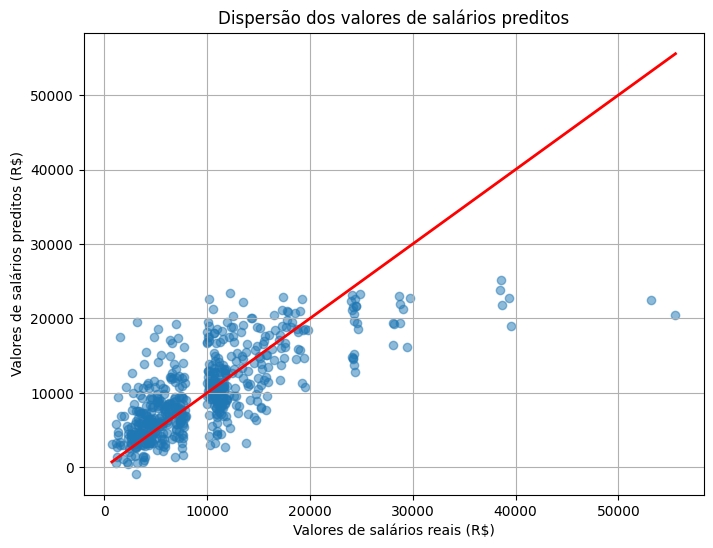

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores de salários reais (R$)')
plt.ylabel('Valores de salários preditos (R$)')
plt.title('Dispersão dos valores de salários preditos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.grid()
plt.show()


- Até os valores de R$ 20.000 reais os valores preditos seguem a tendência dos valores reais. 

- Resultados obtidos indicam que o modelo de regressão linear, embora capture uma parte da variabilidade dos salários, ainda apresenta margem para melhoria.

### 2.4. Avaliando quais atributos possuem maior influência no modelo criado 

In [51]:
nomes_atributos = x_train.columns
nomes_atributos

Index(['IDADE', 'NÃO BRANCA', 'TEMPO DE EXPERINÊNCIA', 'INSATISFACAO SALARIAL',
       'NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS', 'GENERO_Masculino',
       'GENERO_Prefiro não informar', 'SETOR_Educação',
       'SETOR_Entretenimento ou Esportes', 'SETOR_Filantropia/ONG's',
       'SETOR_Finanças ou Bancos', 'SETOR_Indústria',
       'SETOR_Internet/Ecommerce', 'SETOR_Marketing', 'SETOR_Outra Opção',
       'SETOR_Seguros ou Previdência', 'SETOR_Setor Alimentício',
       'SETOR_Setor Automotivo', 'SETOR_Setor Farmaceutico',
       'SETOR_Setor Imobiliário/ Construção Civil', 'SETOR_Setor Público',
       'SETOR_Setor de Energia', 'SETOR_Tecnologia/Fábrica de Software',
       'SETOR_Telecomunicação', 'SETOR_Varejo', 'SETOR_Área da Saúde',
       'SETOR_Área de Consultoria', 'NOVO_NIVEL_Pessoa Gestora',
       'NOVO_NIVEL_Pleno', 'NOVO_NIVEL_Sênior', 'REGIAO ONDE MORA_Nordeste',
       'REGIAO ONDE MORA_Norte', 'REGIAO ONDE MORA_Sudeste',
       'REGIAO ONDE MORA_Sul'],
      dtype=

In [52]:
coeficientes = pd.DataFrame(model.coef_,columns=['coeficientes'], index=nomes_atributos)

In [53]:
coeficientes = coeficientes.sort_values(by='coeficientes', ascending=False)
coeficientes

,coeficientes
NOVO_NIVEL_Pessoa Gestora,4105.143507
NOVO_NIVEL_Sênior,2169.648293
TEMPO DE EXPERINÊNCIA,2109.687809
NOVO_NIVEL_Pleno,995.483351
NUMERO DE FUNCIONARIOS,849.975023
SETOR_Internet/Ecommerce,648.349156
SETOR_Finanças ou Bancos,640.009814
SETOR_Tecnologia/Fábrica de Software,515.441498
GENERO_Masculino,496.914208
NIVEL DE ENSINO,322.382463


Text(0.5, 1.0, 'Inflência de cada atributo no salário')

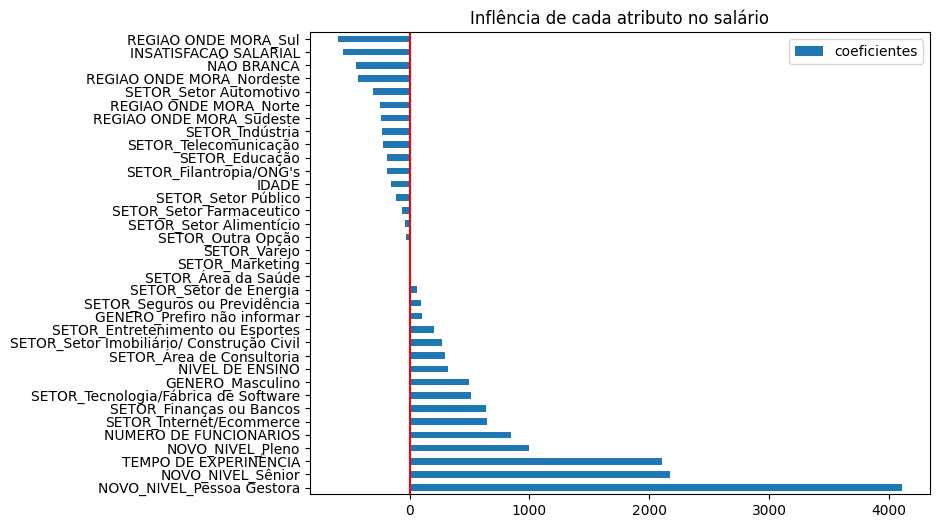

In [56]:
# Visualizando o impacto de cada coeficiente 
coeficientes.plot.barh(figsize=(8,6))
plt.axvline(x=0, color='red')
plt.title('Inflência de cada atributo no salário')


## 3. Conclusões

- A análise dos resultados do modelo de predição de salários revelou que diversos fatores, como **nível de cargo, tempo de experiência, funcionário do gênero masculino**, exercem significativa influência positiva para o aumento dos salários. 

- **Já fatores região (nordeste e norte) e etnia (como pessoas não brancas) exercem signifiacante influência negativa, levando a salário menores.**

- Esses resultados demonstram que, vieses culturais como desigualdade entre gêneros e descriminação racional, refletem diretamente no salário de profissionais da área de TI.

- Consideranto que áres de tecnologia envolvem um constante aprendizado e aprimoramento do nível de ensino, espera-se que o fator **'Nível de ensino'** exerca grande influência no salário dos funcionários. Entretanto, realizando uma análise com olhar para diversidade, os dados apontam que, **mesmo o aumento do nível de ensino sendo um fator positivo para o aumento de salário de funcionários, o fator 'gênero masculino' exerce uma influência de peso similar em funcionários na área de TI**. 

- O modelo ainda apresenta margem para melhoria, com métricas de erro indicando que as previsões podem não ser totalmente precisas.

- Para aprimorar o modelo, sugiro algumas estratégias, como: explorar interações entre variáveis, aplicar transformações não lineares, considerar modelos mais complexos. Ao implementar essas melhorias, é possível construir um modelo mais robusto e preciso para prever salários na área de TI.

- Em resumo, a análise indica que o modelo de regressão linear captura algumas nuances da determinação salarial, mas que ainda há espaço para aprofundar a investigação e refinar as previsões.